# **Proyecto Machine Learning**

Este es un proyecto aplicado de la materia de Machine Learning, en el cual se realizó el entrenamiento de diferentes métodos para predecir cuál de ellos es el más adecuado para el modelo.

## **Contexto Inicial**

Uno de los problemas más recurrentes en las entidades bancarias es predecir el pago de las tarjetas de crédito de los clientes, para pronosticar un reisgo crediticio para el banco.


### **Fuente de los datos**

Los datos fueron tomados de la plataforma Kaggle:
[Default of Credit Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data)


# **Metodología de Trabajo**

En general, se realizará un análisis inicial de los datos, seguido de su limpieza y una conclusión preliminar. Posteriormente, se implementarán diferentes métodos de aprendizaje sobre dichos datos y, finalmente, se evaluarán las métricas obtenidas por cada método de entrenamiento para seleccionar el que mejor se adapte al problema.


# **Proceso de Análisis**

Inicialmente, se cuenta con los datos en el archivo:

- UCI_Credit_Card.csv

Con estos datos se realizará una revisión y limpieza para detectar valores nulos en cada columna, filas repetidas y posibles valores atípicos (outliers) dentro del dataset.

In [178]:
# Importando librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargando las rutas de los archivos del dataset
N_NEIGHBORS = 5
RANDOM_STATE = 42
DATASET_PATH = '/content/UCI_Credit_Card.csv'


In [179]:
# Lectura de datos
df = pd.read_csv(DATASET_PATH)
df.drop(columns='ID', inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## **Graficas de las diferentes variables.**

Se realizó un análisis visual para detectar cuales son las variables que contienen hato rango de variabilidad, con el fin de concluir la normalización dependiendo del tipo de algoritmo de machine learning que se va a usar para los entrenamientos.

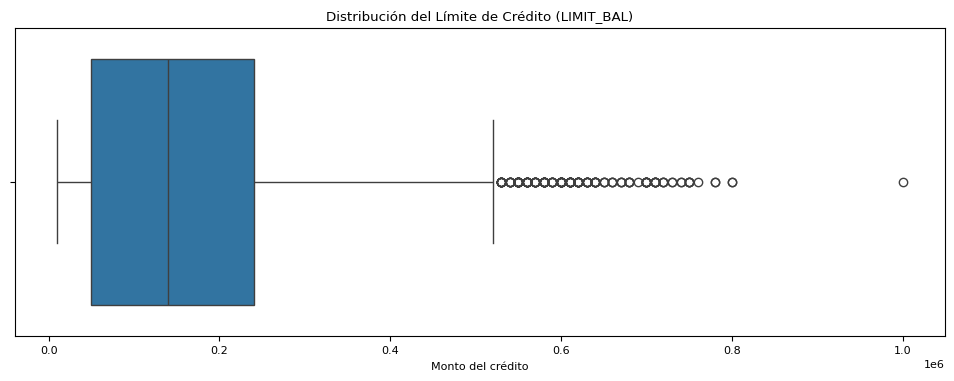

In [180]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Distribución del Límite de Crédito (LIMIT_BAL)')
plt.xlabel('Monto del crédito')
plt.show()

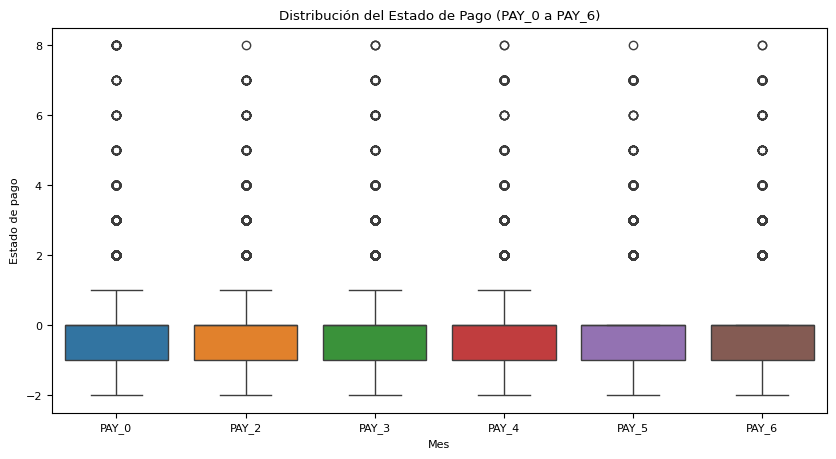

In [181]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[pay_cols])
plt.title('Distribución del Estado de Pago (PAY_0 a PAY_6)')
plt.xlabel('Mes')
plt.ylabel('Estado de pago')
plt.show()

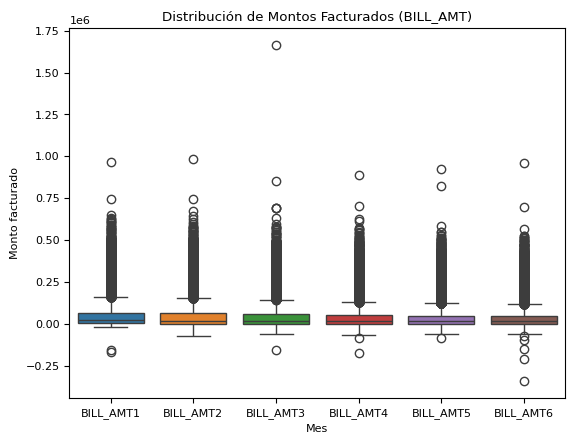

In [182]:
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
             'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure()
sns.boxplot(data=df[bill_cols])
plt.title('Distribución de Montos Facturados (BILL_AMT)')
plt.xlabel('Mes')
plt.ylabel('Monto facturado')
plt.show()

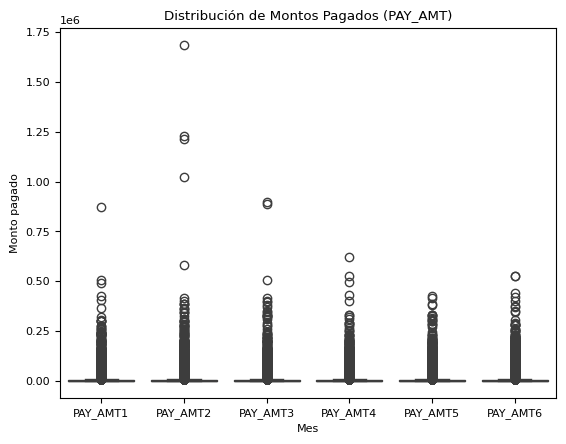

In [183]:
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure()
sns.boxplot(data=df[pay_amt_cols])
plt.title('Distribución de Montos Pagados (PAY_AMT)')
plt.xlabel('Mes')
plt.ylabel('Monto pagado')
plt.show()

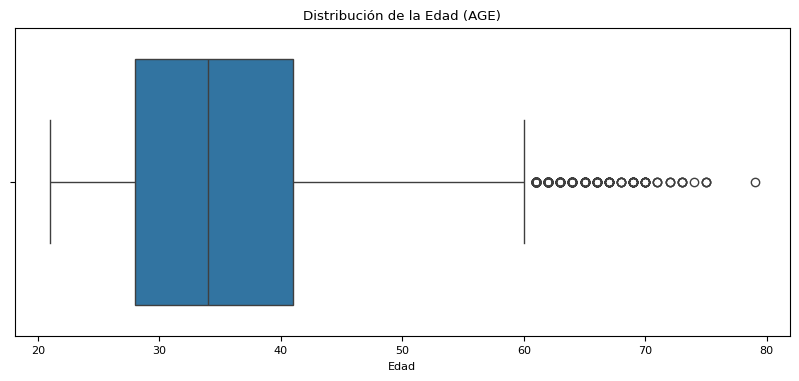

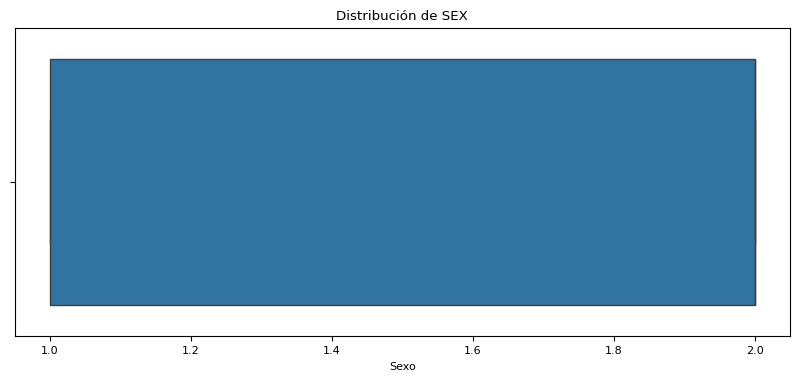

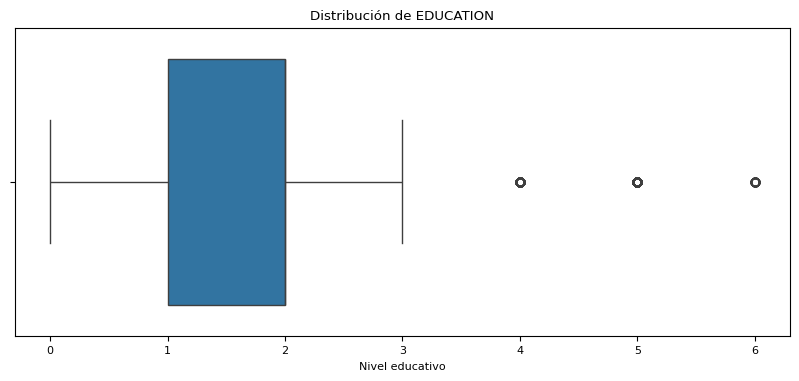

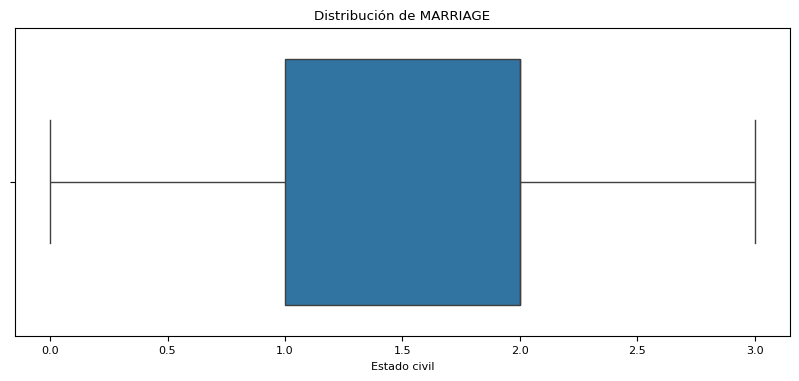

In [184]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['AGE'])
plt.title('Distribución de la Edad (AGE)')
plt.xlabel('Edad')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SEX'])
plt.title('Distribución de SEX')
plt.xlabel('Sexo')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['EDUCATION'])
plt.title('Distribución de EDUCATION')
plt.xlabel('Nivel educativo')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['MARRIAGE'])
plt.title('Distribución de MARRIAGE')
plt.xlabel('Estado civil')
plt.show()

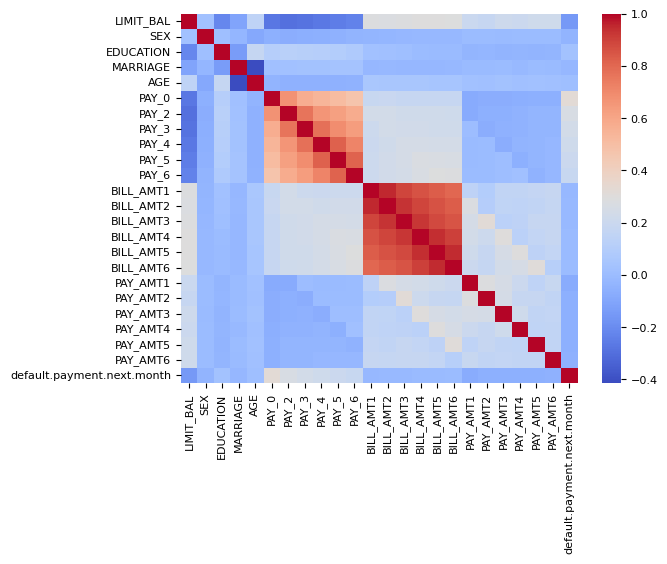

In [185]:
# Correlacion de las variables.
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

### **Analisis Inicial**

- El dataset contiene 30,000 observaciones sin valores faltantes.
- La variable objetivo presenta un desbalance moderado (22% de incumplimiento).
- Las variables financieras muestran grandes diferencias de escala, justificando el uso de normalización.
- Se identifican variables categóricas codificadas numéricamente y variables altamente correlacionadas.

# **Preparación de los Datos**

Se realizó la separación de las variables, escalado y preparación para los diferentes tipos de Algoritmos de entrenamiento.

In [186]:
# Variables predictoras
X = df.drop(columns=['default.payment.next.month'])

# Variable objetivo
y = df['default.payment.next.month']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y # Usado para datasets desbalanceados como en este caso.
)

In [188]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)
X_train_scaled_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
22788,-0.056866,0.80844,0.184523,0.856739,-0.264558,1.793311,1.780193,2.652046,1.911811,0.240260,...,1.778869,1.891679,2.020839,2.096346,0.580657,-0.290332,-0.297820,0.086961,0.500397,0.048745
29006,-0.134081,0.80844,-1.077532,0.856739,-0.155804,0.902944,-0.722324,-0.697642,-1.530826,-1.537252,...,-0.685090,-0.673845,-0.662488,-0.652126,-0.344969,-0.290332,-0.297820,-0.318075,-0.316978,-0.292992
16950,-1.215090,-1.23695,0.184523,-1.059367,1.584260,0.902944,1.780193,0.139780,0.190493,0.240260,...,-0.561615,-0.547887,-0.526789,-0.510492,-0.348128,-0.227081,-0.233069,-0.298554,-0.296710,-0.236970
22280,0.406423,0.80844,-1.077532,0.856739,-0.699574,0.012576,0.111849,0.139780,0.190493,0.240260,...,2.460102,2.738001,1.509166,1.613118,0.215287,0.154056,0.152526,0.000642,0.008643,0.043143
11346,1.101358,0.80844,-1.077532,0.856739,-0.373312,0.902944,-1.556496,-0.697642,0.190493,0.240260,...,-0.680324,-0.668755,-0.666365,-0.656089,-0.348251,-0.274236,-0.297820,-0.318075,-0.316978,-0.225765


# **K-Means**

Se realizó el inicio del método K-Means


In [190]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10, 1)
for k in K:
    print(f'Usando k igual a {k}')
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init="auto")
    kmeans.fit(X_train_scaled_df)
    inertia.append(kmeans.inertia_)

print(K)
print(inertia)

Usando k igual a 1
Usando k igual a 2
Usando k igual a 3
Usando k igual a 4
Usando k igual a 5
Usando k igual a 6
Usando k igual a 7
Usando k igual a 8
Usando k igual a 9
range(1, 10)
[552000.0000000014, 454676.47223600553, 390185.10195972916, 370019.5538460556, 352736.9649346841, 330114.1986964314, 322169.94507339306, 311868.1904994835, 305183.346367096]


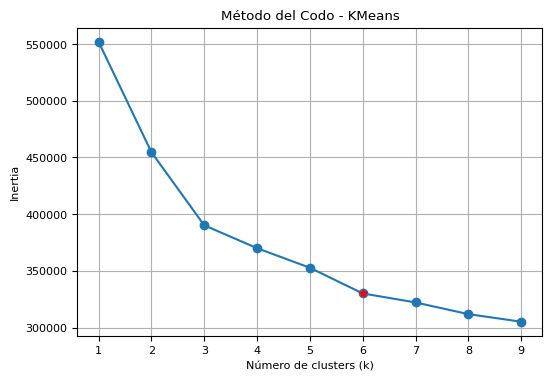

In [191]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.plot(K[5], inertia[5], marker='*', color='red')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo - KMeans')
plt.grid(True)
plt.show()

In [192]:
N_CLUSTERS = 6

kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE, n_init="auto")
modelo = kmeans.fit(X_train_scaled_df)

clusters = modelo.labels_

df_kmeans = X_train.copy()

df_kmeans['Cluster'] = clusters
df_kmeans['Default'] = y_train.values


Revisión de la gráfica para los cluster usando dos variables.

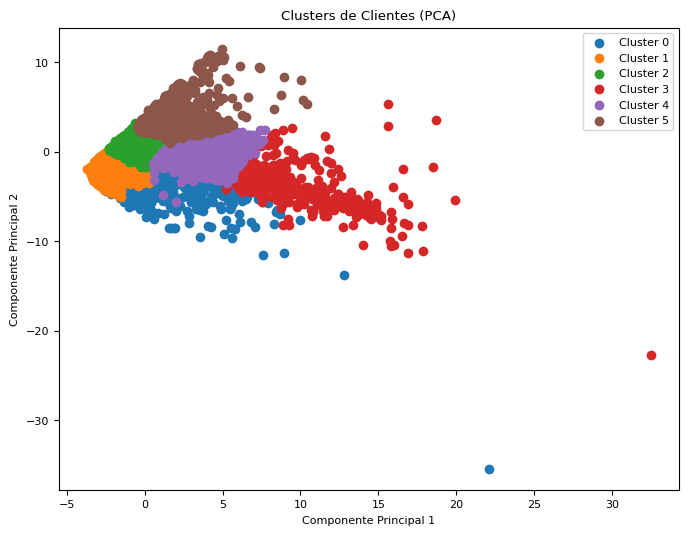


Cluster 0
Cantidad de clientes: 794
Edad promedio: 36.91939546599496
Límite de crédito promedio: 332921.91435768263
Tasa de default: 0.08060453400503778

Cluster 1
Cantidad de clientes: 7081
Edad promedio: 36.69721790707527
Límite de crédito promedio: 220975.8508685214
Tasa de default: 0.16593701454596807

Cluster 2
Cantidad de clientes: 10018
Edad promedio: 34.04312237971651
Límite de crédito promedio: 107176.28269115592
Tasa de default: 0.19484927131163904

Cluster 3
Cantidad de clientes: 689
Edad promedio: 38.37155297532656
Límite de crédito promedio: 374368.6502177068
Tasa de default: 0.21190130624092887

Cluster 4
Cantidad de clientes: 3169
Edad promedio: 36.31776585673714
Límite de crédito promedio: 218646.26065004733
Tasa de default: 0.17544966866519407

Cluster 5
Cantidad de clientes: 2249
Edad promedio: 34.96798577145398
Límite de crédito promedio: 72547.79902178746
Tasa de default: 0.629613161405069


In [193]:
pca = PCA(n_components=N_CLUSTERS)
X_pca = pca.fit_transform(X_train_scaled_df)
pca_list = [f"PCA{i:02d}" for i in range(1, N_CLUSTERS + 1)]

df_pca = pd.DataFrame(
    X_pca,
    columns=pca_list
)

df_pca['Cluster'] = clusters

plt.figure(figsize=(8,6))

for cluster in range(N_CLUSTERS):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster]['PCA01'],
        df_pca[df_pca['Cluster'] == cluster]['PCA02'],
        label=f'Cluster {cluster}'
    )

plt.title('Clusters de Clientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

for i in range(N_CLUSTERS):
    cluster_i = df_kmeans[df_kmeans['Cluster'] == i]

    print(f'\nCluster {i}')
    print('Cantidad de clientes:', cluster_i.shape[0])
    print('Edad promedio:', cluster_i['AGE'].mean())
    print('Límite de crédito promedio:', cluster_i['LIMIT_BAL'].mean())
    print('Tasa de default:', cluster_i['Default'].mean())

### **Metricas para medición del Método K-Means**

Se realizó la revisión de las métricas para para métodos no supervisados.

- **El clustering presenta una separación moderada entre grupos (Silhouette ≈ 0.16, Davies–Bouldin ≈ 1.88), lo cual es esperable en datasets financieros de alta dimensionalidad y solapamiento.**

In [194]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

sil_score = silhouette_score(X_train_scaled_df, df_kmeans['Cluster'])
print(f"Silhouette Score: {sil_score : .3f}")

db = davies_bouldin_score(X_train_scaled_df, df_kmeans['Cluster'])
print(f"Davies-Bouldin: {db : .3f}")

Silhouette Score:  0.165
Davies-Bouldin:  1.880


# **PCA**

Se inicia con el algoritmo para PCA con el fin de entrenar el sistema usando este método, los datos ya se encuentran escalados, por lo tanto se inicia con el entrenamiento.

In [195]:
# Variables predictoras
features = X.columns
print()

pca_list = [f"PCA{i:02d}" for i in range(1, len(features) + 1)]

#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = len(features))
pca_model = pca.fit_transform(X_train_scaled)

X_pca = pd.DataFrame(pca_model, columns = pca_list)
X_pca.head()

,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,PCA08,PCA09,PCA10,...,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,PCA21,PCA22,PCA23
0,5.509448,1.292803,-0.242399,-1.036525,0.677155,0.397272,0.671612,-0.009616,0.081585,-0.532717,...,0.034390,-1.003850,0.784080,-0.943627,0.416337,-0.367439,-0.024230,0.047787,0.008064,-0.004652
1,-2.696747,-0.900244,-0.203564,-1.358116,0.217834,0.265620,-0.195215,0.081591,0.126124,0.070028,...,-0.458112,0.551465,0.252914,-0.271892,0.370465,0.226589,0.018673,-0.002409,-0.009161,-0.000397
2,-0.637669,2.122312,-0.879799,1.769402,-1.189787,-0.306641,-0.041182,-0.086294,0.099936,0.102025,...,-0.797294,-0.018889,-0.719573,-0.069369,-0.703281,-0.198832,0.040566,-0.011059,0.005905,-0.004777
3,4.639699,-1.727419,-0.468933,-2.222675,0.526008,0.106424,-0.493517,0.414516,-0.287556,-0.012013,...,-0.509954,-0.158719,0.032729,0.423250,0.056923,0.025724,0.674478,0.072597,-0.484391,0.127200
4,-2.041999,-0.387973,0.334889,-1.149420,0.066289,0.935646,-0.636384,0.391818,-0.163302,0.078447,...,0.647406,0.865315,1.821164,0.142338,-0.266902,0.552580,-0.082121,-0.045041,-0.011981,0.002208


In [196]:
df_pca = pd.DataFrame(data = pca.components_, columns=features, index = pca_list)
df_pca

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
PCA01,0.068821,-0.022187,0.021664,-0.006521,0.015581,0.158860,0.192385,0.197422,0.205697,0.210031,...,0.351666,0.354968,0.352441,0.344476,0.091852,0.082867,0.088462,0.078869,0.073172,0.069420
PCA02,-0.315869,-0.032000,0.092996,0.044302,-0.066762,0.297902,0.335704,0.344815,0.343278,0.330844,...,-0.141287,-0.143930,-0.141310,-0.138522,-0.152548,-0.148340,-0.154203,-0.146428,-0.134353,-0.131722
PCA03,0.025264,0.010082,-0.227193,0.318720,-0.317461,-0.008104,0.035350,0.082248,0.117952,0.136106,...,-0.121789,-0.088696,-0.073534,-0.074564,0.355154,0.377930,0.347395,0.310185,0.183114,0.269635
PCA04,0.060917,-0.089142,0.325052,-0.548922,0.572541,0.025237,0.045930,0.063529,0.081172,0.080827,...,-0.085007,-0.075013,-0.069024,-0.071536,0.196031,0.222610,0.181597,0.165993,0.091296,0.150293
PCA05,-0.158361,0.873723,0.378038,-0.055432,-0.156230,-0.037025,-0.038353,-0.028456,-0.011777,-0.000139,...,0.025867,0.028620,0.029511,0.003189,0.093157,0.085357,0.053975,0.026432,-0.116889,-0.038050
PCA06,0.341879,0.402610,-0.468034,-0.238732,0.074276,0.029978,0.060057,0.075318,0.090122,0.086603,...,-0.079284,-0.075095,-0.049793,0.050335,-0.207442,-0.231535,-0.160736,-0.000292,0.497287,0.128094
PCA07,-0.162604,-0.117447,0.511189,0.218521,-0.099067,0.045243,0.057235,0.015625,-0.039970,-0.094591,...,0.017207,-0.043824,-0.087612,0.028739,-0.036297,-0.072113,-0.181493,-0.139818,0.635549,0.354575
PCA08,0.097631,0.057367,-0.142208,-0.051539,0.016252,-0.009385,-0.003546,0.035040,0.055318,0.027016,...,0.105188,0.026230,-0.080984,-0.180526,0.201060,0.110523,-0.242397,-0.476260,-0.358900,0.657780
PCA09,-0.002671,-0.007332,0.089693,0.022606,-0.030595,0.078087,0.074502,0.011899,-0.058735,-0.087321,...,-0.082478,-0.059302,0.081126,-0.030315,-0.258771,-0.389482,-0.019657,0.637408,-0.304057,0.476075
PCA10,0.032819,0.014959,0.043705,0.018716,0.001720,0.042065,0.029549,-0.040468,-0.067300,0.055172,...,-0.100727,0.110418,0.003029,0.004056,-0.391853,-0.152738,0.777133,-0.383429,-0.016991,0.174781


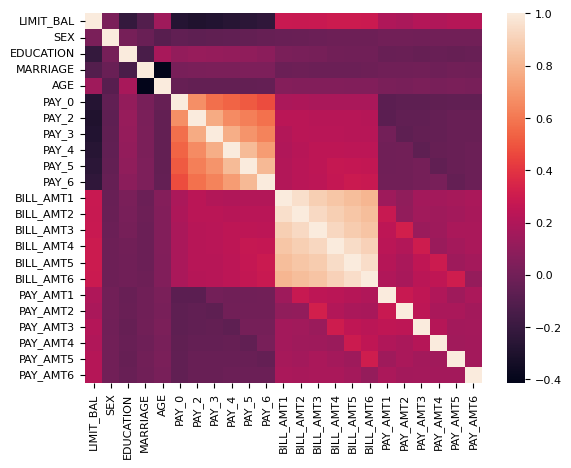

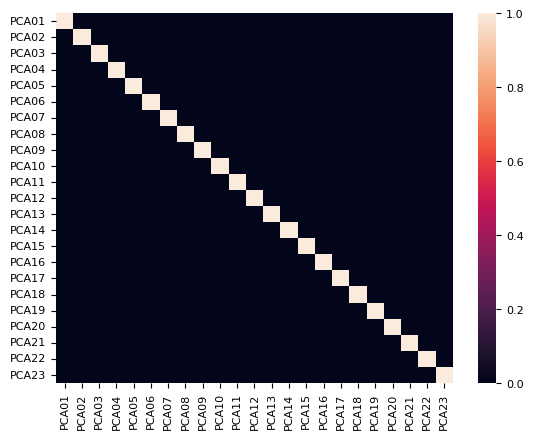

In [197]:
# Con los datos estandarizados
# X_pca.corr() # Correlación
plt.figure()
sns.heatmap(X.corr())
plt.show()

plt.figure()
sns.heatmap(X_pca.corr())
plt.show()

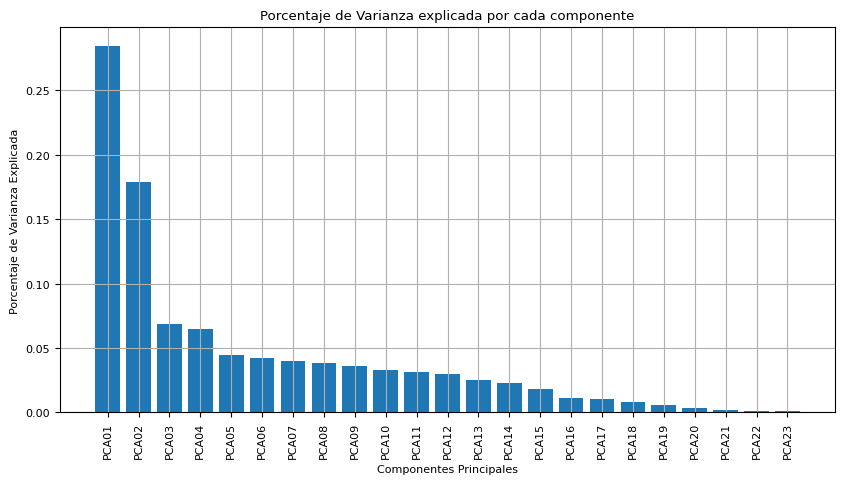

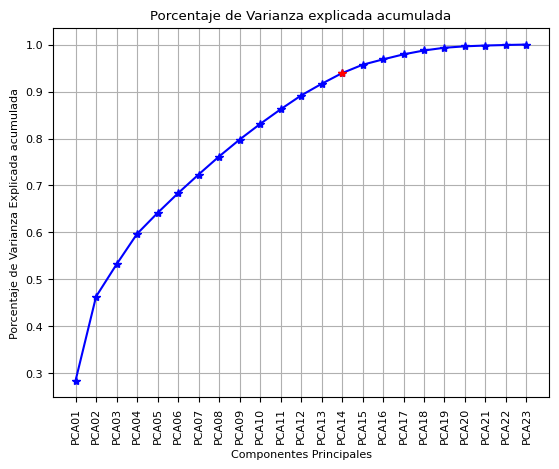

In [198]:
# Despues de la estandarización se toman desicione cuales PCA son los que se pueden tomar para el modelo.

valor_x = pca_list
valor_y = pca.explained_variance_ratio_
valor_y_accum = valor_y.cumsum()

plt.figure(figsize = (10, 5))
plt.title('Porcentaje de Varianza explicada por cada componente')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.bar(valor_x, valor_y)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure()
plt.title('Porcentaje de Varianza explicada acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada acumulada')
plt.plot(valor_x, valor_y_accum, linestyle='-', marker='*', color='blue')
plt.plot(valor_x[13], valor_y_accum[13], linestyle='-', marker='*', color='red')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [199]:
PCA_COMPONENTS = 14
pca_components = PCA(n_components = PCA_COMPONENTS)
pca_model_comps = pca_components.fit_transform(X_train_scaled)
pca_list_comps = pca_list[:PCA_COMPONENTS]
X_std_comps = pd.DataFrame(pca_model_comps, columns = pca_list_comps)
X_std_comps.head()

,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,PCA08,PCA09,PCA10,PCA11,PCA12,PCA13,PCA14
0,5.509448,1.292803,-0.242399,-1.036525,0.677155,0.397272,0.671612,-0.009616,0.081585,-0.532717,0.686669,1.258644,0.773168,0.034390
1,-2.696747,-0.900244,-0.203564,-1.358116,0.217834,0.265620,-0.195215,0.081591,0.126124,0.070028,0.126889,1.767379,0.732259,-0.458112
2,-0.637669,2.122312,-0.879799,1.769402,-1.189787,-0.306641,-0.041182,-0.086294,0.099936,0.102025,0.022163,1.020808,-0.033433,-0.797294
3,4.639699,-1.727419,-0.468933,-2.222675,0.526008,0.106424,-0.493517,0.414516,-0.287556,-0.012013,-0.001051,0.038023,0.047079,-0.509954
4,-2.041999,-0.387973,0.334889,-1.149420,0.066289,0.935646,-0.636384,0.391818,-0.163302,0.078447,-0.101959,0.375810,0.978435,0.647406


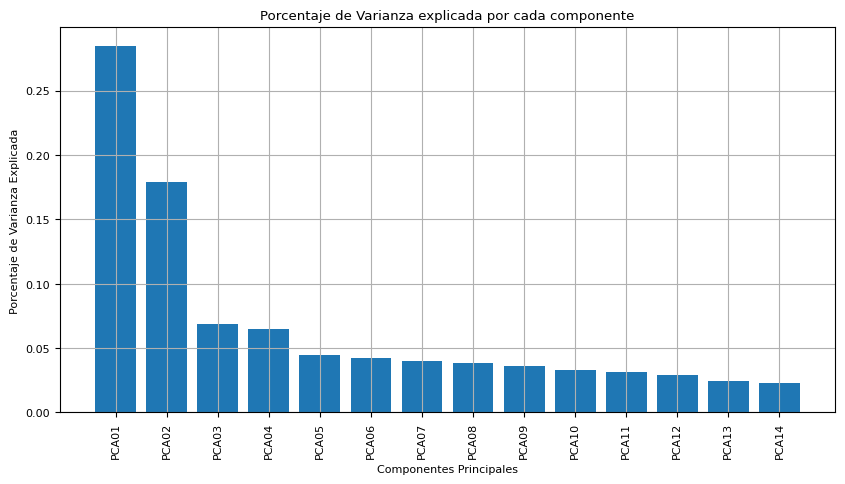

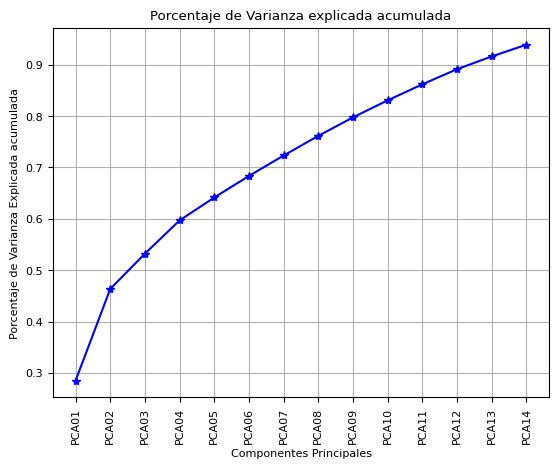

In [200]:
valor_x = pca_list_comps
valor_y = pca_components.explained_variance_ratio_
valor_y_accum = valor_y.cumsum()

plt.figure(figsize = (10, 5))
plt.title('Porcentaje de Varianza explicada por cada componente')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.bar(valor_x, valor_y)
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

plt.figure()
plt.title('Porcentaje de Varianza explicada acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada acumulada')
plt.plot(valor_x, valor_y_accum, linestyle='-', marker='*', color='blue')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

## **CONCLUSIONES PCA:**

- Se aplicó Análisis de Componentes Principales (PCA) sobre los datos estandarizados.
- La varianza explicada acumulada muestra que las primeras 14 componentes concentran poco más del 80% de la variabilidad total del dataset, lo que indica una reducción significativa de dimensionalidad con mínima pérdida de información.
- Las componentes resultantes presentan baja correlación entre sí, confirmando la correcta aplicación del método. PCA será utilizado posteriormente como base para el modelo de Regresión por Componentes Principales (PCR).

# **Regresion PCR - Lasso - Ridge**

## **Regresion Lineal**

In [201]:
# PCA ya entrenado con X_train
X_train_pca = pca_components.fit_transform(X_train_scaled)
X_test_pca = pca_components.transform(X_test_scaled)

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_pred_lr = lr.predict(X_test_pca)

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

df_resultados_lr = pd.DataFrame({
    'y_real': y_test.reset_index(drop=True),
    'y_pred': y_pred_lr
})

df_resultados_lr.sample(10)


MSE: 0.15478506201141162
RMSE: 0.3934273274842657
MAE: 0.31059386339712086
R2: 0.10140325237191805


,y_real,y_pred
2617,0,0.208662
2160,1,0.235204
2243,0,0.394932
3252,1,0.166311
381,0,0.181267
4436,0,0.220481
1965,0,0.151022
4651,0,0.165642
191,0,0.046124
3610,0,0.180473


In [203]:
importancia = pd.DataFrame(pca_components.components_.T, columns=pca_list_comps, index = X_test_scaled_df.columns)
importancia

,PCA01,PCA02,PCA03,PCA04,PCA05,PCA06,PCA07,PCA08,PCA09,PCA10,PCA11,PCA12,PCA13,PCA14
LIMIT_BAL,0.068821,-0.315869,0.025264,0.060917,-0.158361,0.341879,-0.162604,0.097631,-0.002671,0.032819,-0.038401,-0.087375,0.352504,0.758311
SEX,-0.022187,-0.032000,0.010082,-0.089142,0.873723,0.402610,-0.117447,0.057367,-0.007332,0.014959,0.003015,0.064555,0.174965,-0.109222
EDUCATION,0.021664,0.092996,-0.227193,0.325052,0.378038,-0.468034,0.511189,-0.142208,0.089693,0.043705,-0.035352,-0.178809,0.083767,0.370010
MARRIAGE,-0.006521,0.044302,0.318720,-0.548922,-0.055432,-0.238732,0.218521,-0.051539,0.022606,0.018716,-0.021549,-0.131999,0.670112,-0.127829
AGE,0.015581,-0.066762,-0.317461,0.572541,-0.156230,0.074276,-0.099067,0.016252,-0.030595,0.001720,0.013693,-0.044981,0.582345,-0.429152
PAY_0,0.158860,0.297902,-0.008104,0.025237,-0.037025,0.029978,0.045243,-0.009385,0.078087,0.042065,0.024689,0.637064,0.142529,0.107204
PAY_2,0.192385,0.335704,0.035350,0.045930,-0.038353,0.060057,0.057235,-0.003546,0.074502,0.029549,0.011595,0.373908,0.074255,0.074052
PAY_3,0.197422,0.344815,0.082248,0.063529,-0.028456,0.075318,0.015625,0.035040,0.011899,-0.040468,0.116422,0.082448,0.052779,0.078789
PAY_4,0.205697,0.343278,0.117952,0.081172,-0.011777,0.090122,-0.039970,0.055318,-0.058735,-0.067300,-0.041886,-0.201769,0.023737,0.062997
PAY_5,0.210031,0.330844,0.136106,0.080827,-0.000139,0.086603,-0.094591,0.027016,-0.087321,0.055172,-0.043955,-0.356734,-0.020376,0.021496


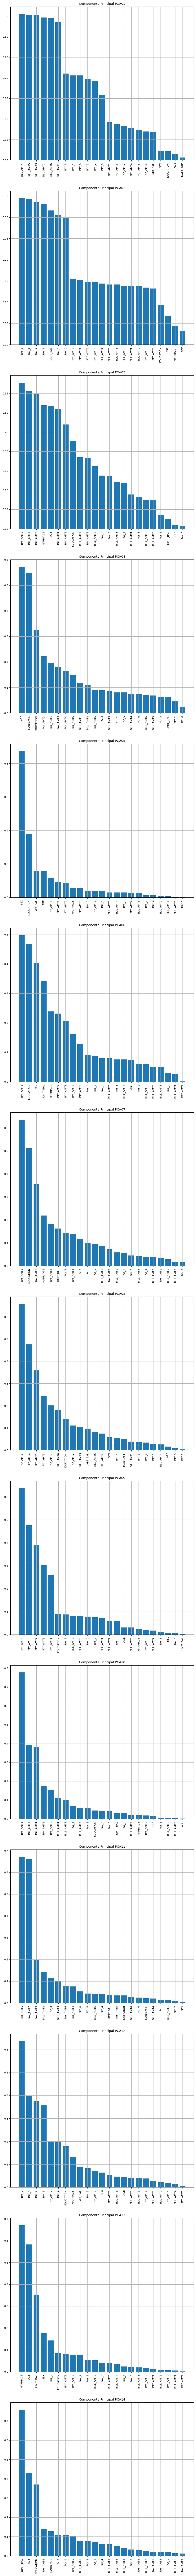

In [204]:
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(len(pca_list_comps),1,figsize=(10, 10*len(pca_list_comps)))
index = 0
for pca_num in pca_list_comps:
    ax[index].set_title(f'Componente Principal {pca_num}')
    impact_pc1 = importancia[pca_num].abs().sort_values(ascending=False)
    ax[index].bar(x=impact_pc1.index,height=impact_pc1.values)
    ax[index].tick_params(axis='x', labelrotation=90)
    ax[index].grid(True)
    index += 1

plt.show()

## **Ridge**

In [205]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

modelo_ridge = Ridge(alpha=1, random_state=1)
modelo_ridge.fit(X_train_pca, y_train)

y_pred = modelo_ridge.predict(X_test_pca)

# Evaluar el rendimiento
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error cuadrático medio:", mse)

Error cuadrático medio: 0.3934271969814201


In [206]:
lista_alphas = [0.1, 0.3, 0.5, 0.7, 1.0, 10.0, 100.0]
ridge_score = []

for i in lista_alphas:
    modelo_ridge = Ridge(alpha=i, random_state=1)
    modelo_ridge.fit(X_train_pca, y_train)

    y_pred = modelo_ridge.predict(X_test_pca)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))

    ridge_score.append(mse)

print("Imprimiendo Alphas")
for alpha, error in zip(lista_alphas, ridge_score):
    print(f"Alpha={alpha} → RMSE={error}")

Imprimiendo Alphas
Alpha=0.1 → RMSE=0.3934273144312014
Alpha=0.3 → RMSE=0.39342728832692614
Alpha=0.5 → RMSE=0.39342726222512175
Alpha=0.7 → RMSE=0.39342723612578817
Alpha=1.0 → RMSE=0.3934271969814201
Alpha=10.0 → RMSE=0.393426025232732
Alpha=100.0 → RMSE=0.3934145798874964


In [207]:
# Modelo con el mayor Alpha
modelo_ridge = Ridge(alpha=0.1, random_state=1)
modelo_ridge.fit(X_train_pca, y_train)

y_pred_ridge = modelo_ridge.predict(X_test_pca)

print(f'Coeficientes del modelo ridge: \n{modelo_ridge.coef_}')
print(f'Intercepto del modelo rdge: {modelo_ridge.intercept_}')

# Métricas de evaluación
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))

Coeficientes del modelo ridge: 
[ 0.01315462  0.05920384 -0.00355773  0.01464904 -0.01747547  0.01166085
 -0.00488864 -0.00293914  0.00975023  0.00810489  0.00333809  0.07675331
  0.01067471 -0.0053704 ]
Intercepto del modelo rdge: 0.22120833333333334
MSE: 0.1547850517405474
RMSE: 0.3934273144312014
MAE: 0.31059388299685897
R2: 0.10140331199889407


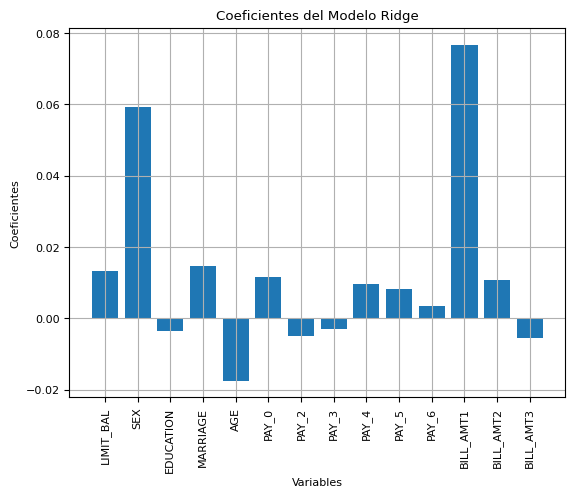

In [208]:
plt.figure()
plt.bar(X_test_scaled_df.columns[:len(modelo_ridge.coef_)], modelo_ridge.coef_)
plt.title('Coeficientes del Modelo Ridge')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## **Lasso**

In [209]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

modelo_lasso = Lasso(alpha=1, random_state=1, max_iter=10000)
modelo_lasso.fit(X_train_pca, y_train)

y_pred = modelo_lasso.predict(X_test_pca)

# Evaluar el rendimiento
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error cuadrático medio:", mse)


Error cuadrático medio: 0.41503249747258747


In [210]:
lista_alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 6e-2, 7e-2]
lasso_score = []

for i in lista_alphas:
    modelo_lasso = Lasso(alpha=i, random_state=1, max_iter=10000)
    modelo_lasso.fit(X_train_pca, y_train)

    y_pred = modelo_lasso.predict(X_test_pca)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))

    lasso_score.append(mse)

print("Imprimiendo Alphas")
for alpha, error in zip(lista_alphas, lasso_score):
    print(f"Alpha={alpha} → RMSE={error}")



Imprimiendo Alphas
Alpha=0.0001 → RMSE=0.39341355525224325
Alpha=0.0005 → RMSE=0.3933637374226544
Alpha=0.001 → RMSE=0.39331332870386815
Alpha=0.005 → RMSE=0.39342558718634657
Alpha=0.01 → RMSE=0.393734078551413
Alpha=0.05 → RMSE=0.39882072220529835
Alpha=0.06 → RMSE=0.39962817192946315
Alpha=0.07 → RMSE=0.4001789912808198


In [211]:
modelo_lasso = Lasso(alpha=7e-2, random_state=1, max_iter=10000)
modelo_lasso.fit(X_train_pca, y_train)

y_pred_lasso = modelo_lasso.predict(X_test_pca)

print(f'Coeficientes del modelo Lasso: \n{modelo_lasso.coef_}')
print(f'Intercepto del modelo Lasso: {modelo_lasso.intercept_}')

Coeficientes del modelo Lasso: 
[ 0.00246845  0.04217819 -0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.        ]
Intercepto del modelo Lasso: 0.22120833333333334


In [212]:
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))


MSE: 0.16014322506253445
RMSE: 0.4001789912808198
MAE: 0.32567223713078214
R2: 0.07029671128564086


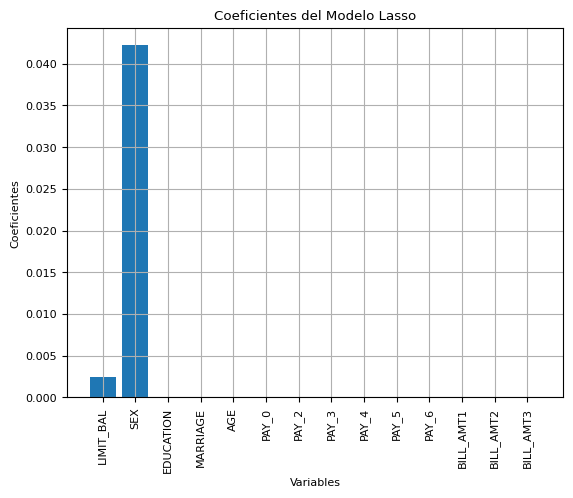

In [213]:
plt.figure()
plt.bar(X_test_scaled_df.columns[:len(modelo_lasso.coef_)], modelo_lasso.coef_)
plt.title('Coeficientes del Modelo Lasso')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# **K-Nearest Neighbors (KNN)**

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cantidad_vecinos = np.arange(1, 21)

train_accuracies = {}
test_accuracies = {}

for k in cantidad_vecinos:
    print(f'Revisando los vecinos: {k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_accuracies[k] = knn.score(X_train_scaled, y_train)
    test_accuracies[k] = knn.score(X_test_scaled, y_test)


Revisando los vecinos: 1
Revisando los vecinos: 2
Revisando los vecinos: 3
Revisando los vecinos: 4
Revisando los vecinos: 5
Revisando los vecinos: 6
Revisando los vecinos: 7
Revisando los vecinos: 8
Revisando los vecinos: 9
Revisando los vecinos: 10
Revisando los vecinos: 11
Revisando los vecinos: 12
Revisando los vecinos: 13
Revisando los vecinos: 14
Revisando los vecinos: 15
Revisando los vecinos: 16
Revisando los vecinos: 17
Revisando los vecinos: 18
Revisando los vecinos: 19
Revisando los vecinos: 20


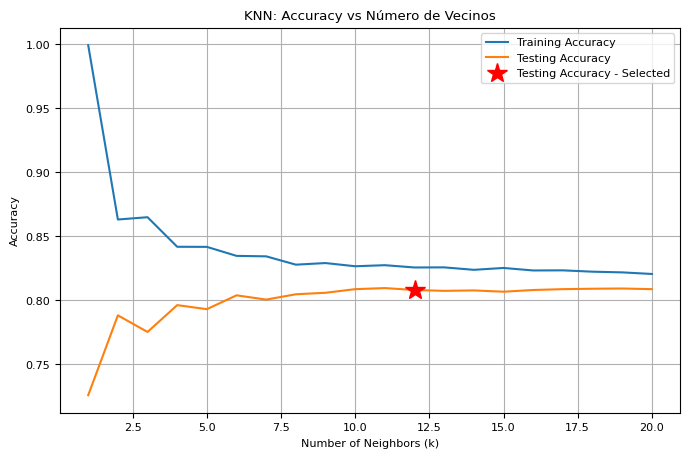

In [215]:
test_acc = list(test_accuracies.values())
train_acc = list(train_accuracies.values())

plt.figure(figsize=(8,5))
plt.title("KNN: Accuracy vs Número de Vecinos")

plt.plot(cantidad_vecinos, train_acc, label="Training Accuracy")
plt.plot(cantidad_vecinos, test_acc, label="Testing Accuracy")

plt.plot(cantidad_vecinos[11], test_acc[11],
         marker='*', color='red', markersize=15,
         linestyle='None',
         label="Testing Accuracy - Selected")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


Matriz de Confusión:


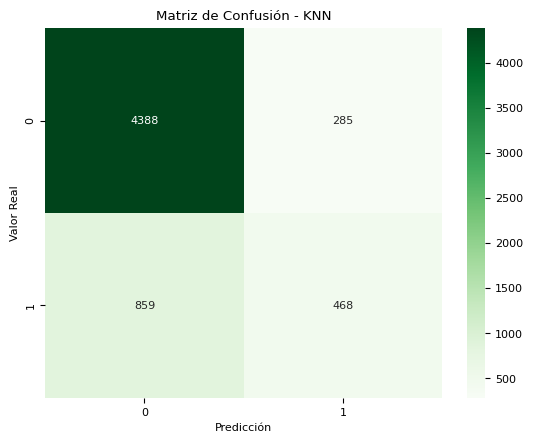

In [216]:
from sklearn.metrics import confusion_matrix

# Utilizando un nuevo valor de la cantidad de Vecinos:
N_NEIGHBORS = 11
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
knn.fit(X_train_scaled, y_train)

y_pred_KNN = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_KNN)

print("Matriz de Confusión:")

# Grafica de la Matriz de confusión
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

In [217]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

accuracy = accuracy_score(y_test, y_pred_KNN)
precision = precision_score(y_test, y_pred_KNN)
recall = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

Accuracy : 0.8093
Precision: 0.6215
Recall   : 0.3527
F1-score : 0.4500


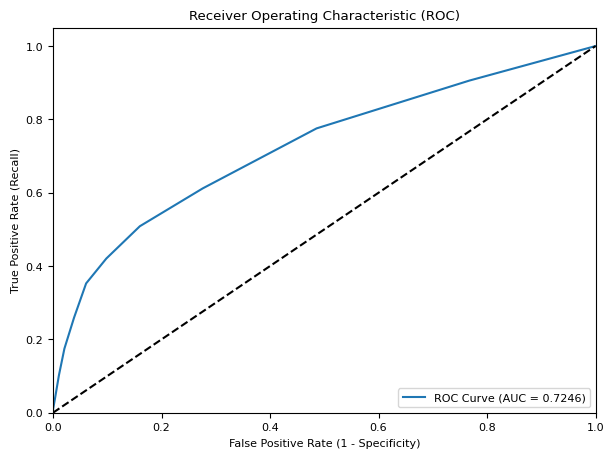

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_KNN = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_KNN, drop_intermediate=False)
roc_auc = roc_auc_score(y_test, y_prob_KNN)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Arbol de Decisión**

In [219]:

scaler = StandardScaler()

X_train_std = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_std = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_arbol = DecisionTreeClassifier(
    min_samples_leaf=0.05,
    max_depth=3,
    random_state=1,
    class_weight='balanced'
)

model_arbol.fit(X_train_std, y_train)

y_pred_arbol = model_arbol.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred_arbol)
precision = precision_score(y_test, y_pred_arbol)
recall = recall_score(y_test, y_pred_arbol)
f1 = f1_score(y_test, y_pred_arbol)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.7782
Precision: 0.4985
Recall   : 0.4974
F1-score : 0.4979


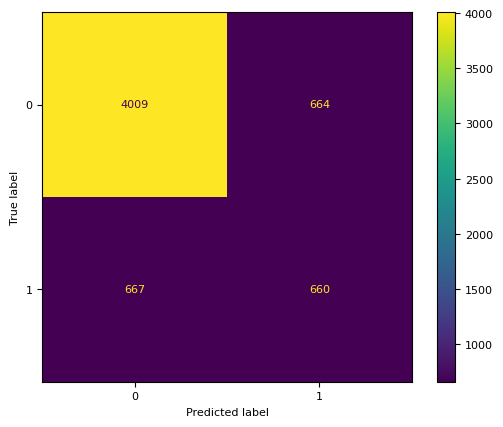

In [221]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_arbol, labels=model_arbol.classes_)
ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model_arbol.classes_
).plot()
plt.show()


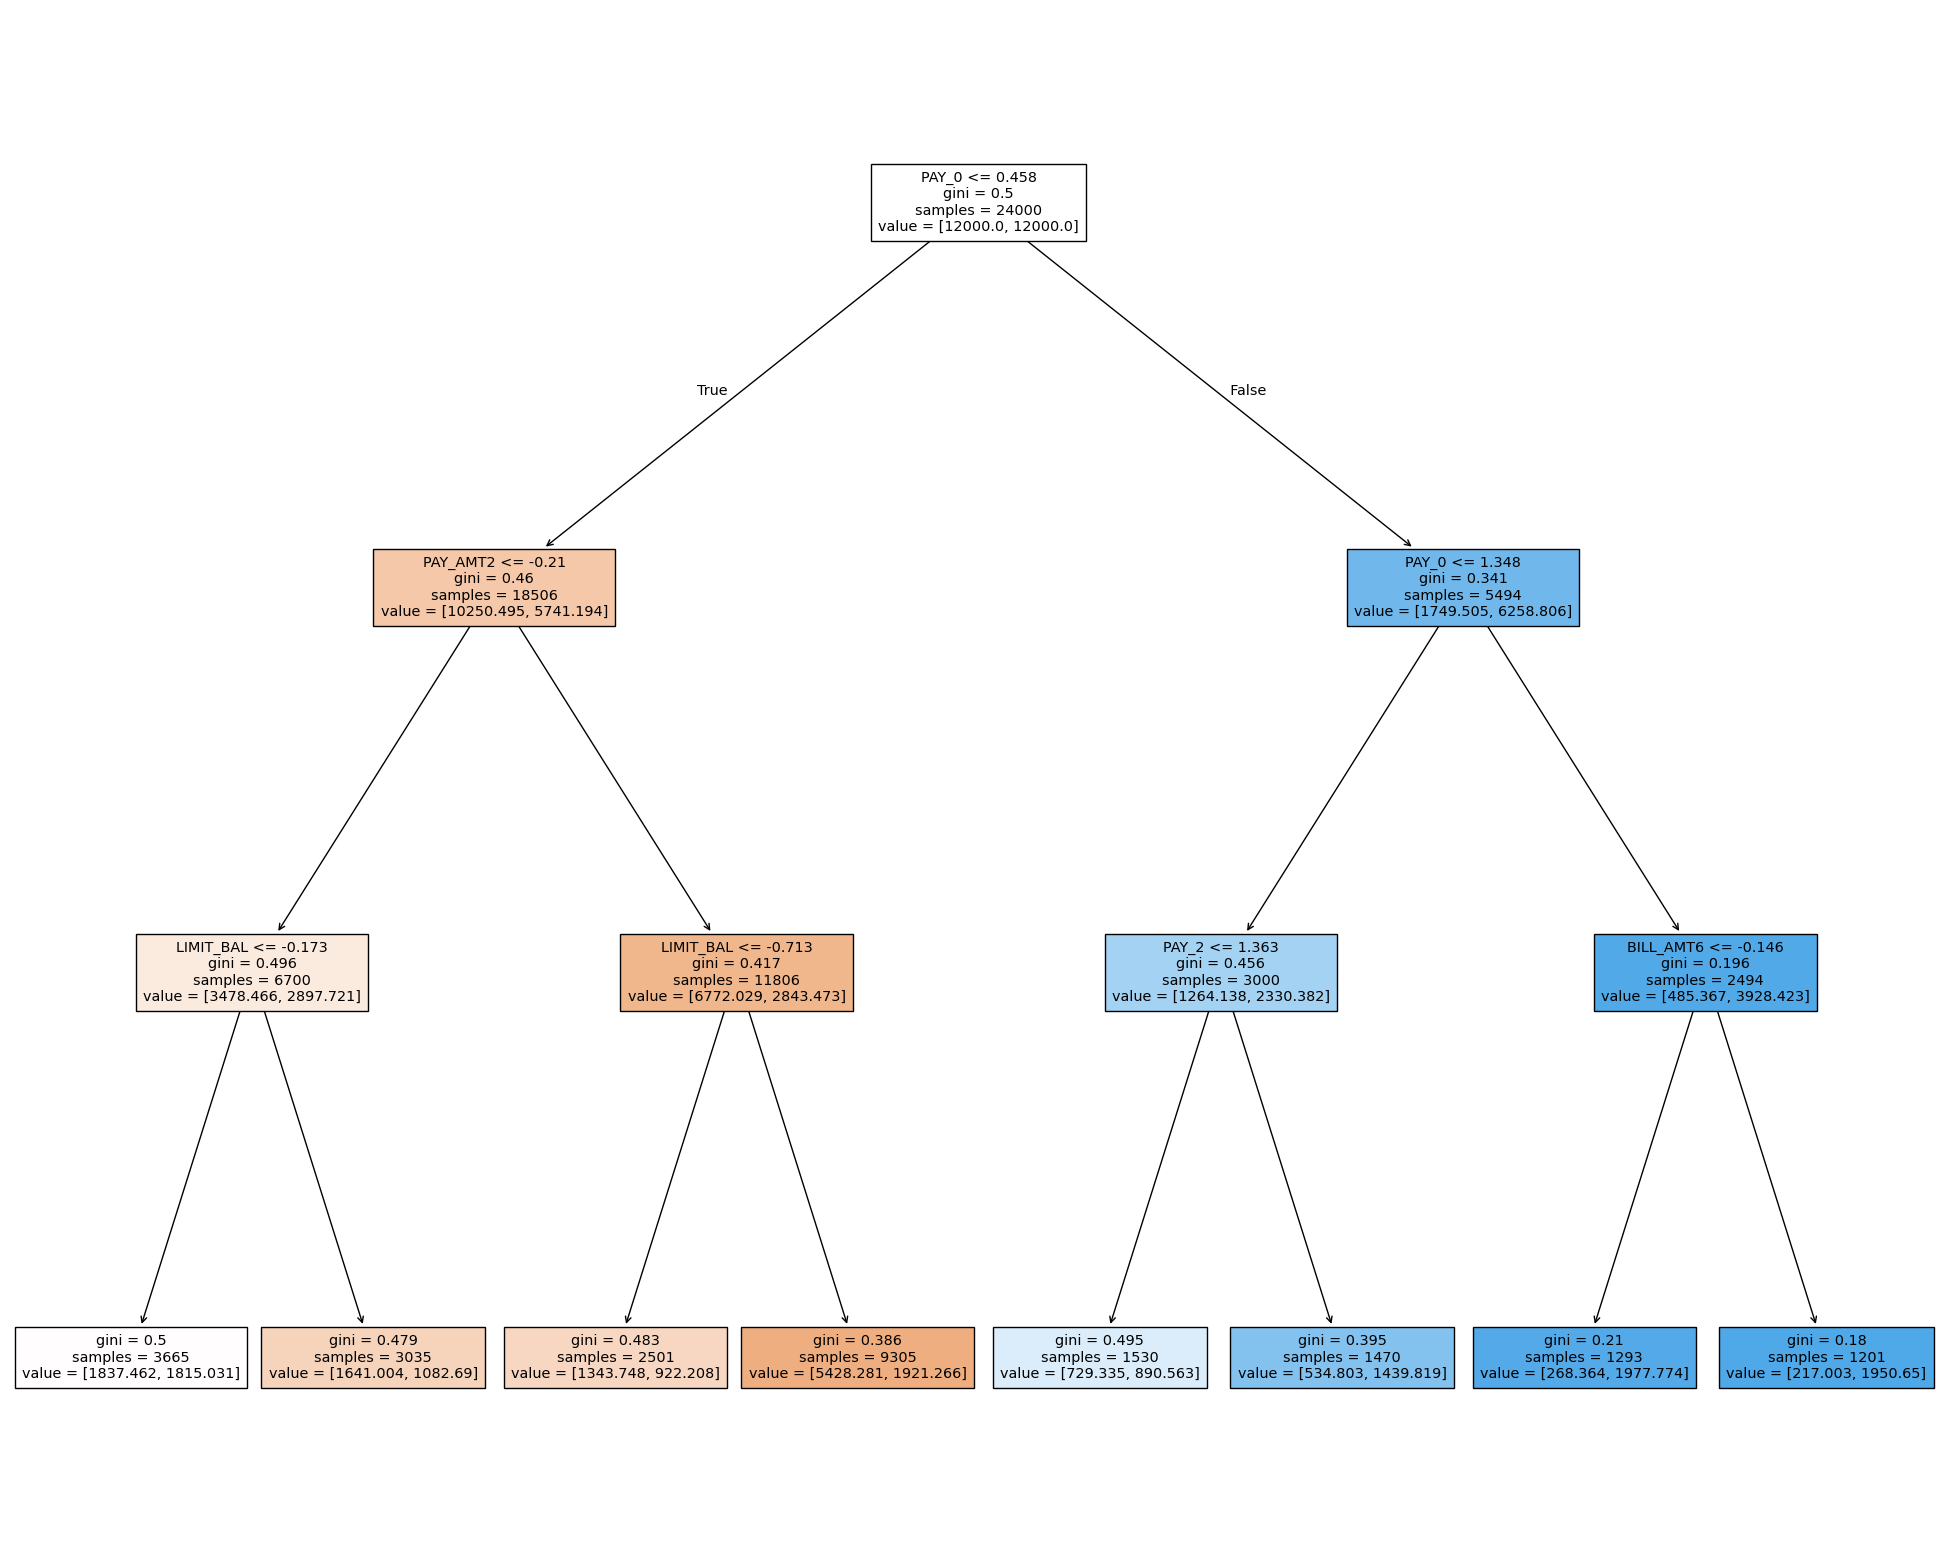

In [222]:
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(
    model_arbol,
    feature_names=X_train_std.columns,
    filled=True
)
plt.show()
